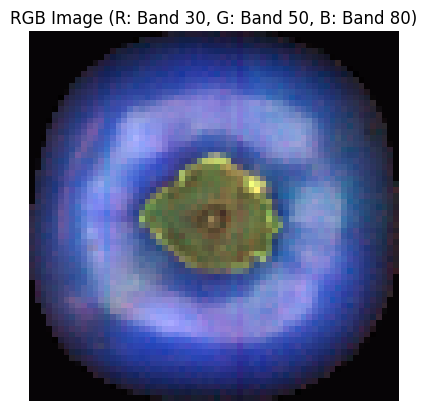

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Function to read binary data and reshape it according to the header file specifications
def read_bin_file(bin_file_path, hdr_file_path):
    try:
        # Parse the .hdr file to get the dimensions (width, height, bands)
        with open(hdr_file_path, 'r') as f:
            for line in f:
                if "samples" in line:
                    width = int(line.split('=')[-1].strip())
                elif "lines" in line:
                    height = int(line.split('=')[-1].strip())
                elif "bands" in line:
                    bands = int(line.split('=')[-1].strip())

        # Read the .bin file and reshape it into the proper dimensions
        bin_path = os.path.join(bin_file_path)
        with open(bin_path, 'rb') as f:
            data = np.fromfile(f, dtype=np.float32)
        
        # Reshape the binary data into a 3D numpy array (height, width, bands)
        data = data.reshape((height, width, bands))
        
        return data
    
    except FileNotFoundError as e:
        print(f"File not found: {e.filename}")
        return None  # Return None if the file is not found or there's an error
    except Exception as e:
        print(f"An error occurred while reading the file: {str(e)}")
        return None

# Function to display an RGB image using three bands from the hyperspectral image
def display_rgb_image(image, red_band, green_band, blue_band):
    if any(band >= image.shape[2] for band in [red_band, green_band, blue_band]):
        print("One or more band numbers are out of range.")
        return

    # Normalize each band for better visualization
    def normalize_band(band):
        return (band - band.min()) / (band.max() - band.min())

    # Extract and normalize the three bands
    red = normalize_band(image[:, :, red_band])
    green = normalize_band(image[:, :, green_band])
    blue = normalize_band(image[:, :, blue_band])

    # Stack the three bands to create an RGB image
    rgb_image = np.stack([red, green, blue], axis=-1)

    # Display the RGB image
    plt.imshow(rgb_image)
    plt.title(f'RGB Image (R: Band {red_band}, G: Band {green_band}, B: Band {blue_band})')
    plt.axis('off')
    plt.show()


# Assuming 'hyperspectral_data' contains the 3D hyperspectral image (height, width, bands)
bin_file = 'K:\HSI\Kaki\VIS\day_1_m3\kaki_day_1_m3_01_front.bin'
hdr_file = 'K:\HSI\Kaki\VIS\day_1_m3\kaki_day_1_m3_01_front.hdr'

# Load the hyperspectral image
hyperspectral_data = read_bin_file(bin_file, hdr_file)
# Example usage: Display RGB image using bands 30 (red), 50 (green), and 80 (blue)
display_rgb_image(hyperspectral_data, 30, 50, 80)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


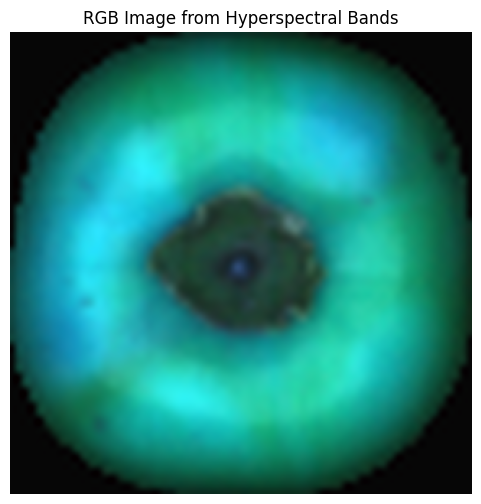

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import zoom
# Define image dimensions (replace with your actual dimensions)
width = 64 # replace with actual width
height = 64  # replace with actual height
bands = 224   # number of bands
# Read the .bin file
file_path ='K:\HSI\Kaki\VIS\day_1_m3\kaki_day_1_m3_01_back.bin'

# replace with your file path
data = np.fromfile(file_path, dtype=np.float32)  # 32-bit floating point as per 'data type = 4'
data = data.reshape((height, width, bands))  # reshape to (lines, samples, bands)

red_band = data[:, :, 40]
green_band = data[:, :, 70]
blue_band = data[:, :, 100]

# Stack selected bands to form an RGB image
rgb_image = np.stack((red_band, green_band, blue_band), axis=-1)

# Normalize the RGB image for better visualization (scaling values to 0-1)
rgb_image = (rgb_image - rgb_image.min()) / (rgb_image.max() - rgb_image.min())

# Option to resize the image for better display (optional)
zoom_factor = 5  # Increase the zoom factor as needed
resized_rgb_image = zoom(rgb_image, (zoom_factor, zoom_factor, 1), order=3)

# Display the RGB image
plt.figure(figsize=(6, 6))
plt.imshow(resized_rgb_image)
plt.title("RGB Image from Hyperspectral Bands")
plt.axis('off')  # Hide axes for better visualization
plt.show()

